In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats

#graph
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

### <font color='blue'> OECD Data </font>

#### Import Data

In [2]:
# to make a list of csvs titles that will be nested together
# dl = download

#to read csv of data

## data source: OECD
dl_avg_annual_hrs_worked_df = pd.read_csv('../data/OECD_Avg_annual_hours_worked_per_worker_original_file.csv')
dl_avg_annual_wages_df = pd.read_csv('../data/OECD_Average_annual_wages_original_file.csv')
dl_causes_of_mortality_df = pd.read_csv('../data/OECD_Causes_of_mortality_original_file.csv')
# dl_composite_leading_indicators_df = pd.read_csv('../data/OECD_Compsite_Leading_Indicators_original_file.csv')


#### High-level Data Cleaning & Aggregation

In [3]:
## this dataset has two layer of filtering
dl_causes_of_mortality_df = dl_causes_of_mortality_df.loc[dl_causes_of_mortality_df['Measure'] == 'Number of total deaths']
dl_causes_of_mortality_df.head(10)

,VAR,Variable,UNIT,Measure,COU,Country,YEA,Year,Value,Flag Codes,Flags
154249,CICDALLC,All causes of death,NBPOPUPC,Number of total deaths,AUS,Australia,2000,2000,128784.0,NaN,NaN
154250,CICDALLC,All causes of death,NBPOPUPC,Number of total deaths,AUS,Australia,2001,2001,128657.0,NaN,NaN
154251,CICDALLC,All causes of death,NBPOPUPC,Number of total deaths,AUS,Australia,2002,2002,133047.0,NaN,NaN
154252,CICDALLC,All causes of death,NBPOPUPC,Number of total deaths,AUS,Australia,2003,2003,131784.0,NaN,NaN
154253,CICDALLC,All causes of death,NBPOPUPC,Number of total deaths,AUS,Australia,2004,2004,132314.0,NaN,NaN
154254,CICDALLC,All causes of death,NBPOPUPC,Number of total deaths,AUS,Australia,2006,2006,133739.0,NaN,NaN
154255,CICDALLC,All causes of death,NBPOPUPC,Number of total deaths,AUS,Australia,2007,2007,137854.0,NaN,NaN
154256,CICDALLC,All causes of death,NBPOPUPC,Number of total deaths,AUS,Australia,2008,2008,143946.0,NaN,NaN
154257,CICDALLC,All causes of death,NBPOPUPC,Number of total deaths,AUS,Australia,2009,2009,140760.0,NaN,NaN
154258,CICDALLC,All causes of death,NBPOPUPC,Number of total deaths,AUS,Australia,2010,2010,143473.0,NaN,NaN


In [4]:
descriptions = ['Total employment','In 2018 constant prices at 2018 USD PPPs','All causes of death']

In [5]:
# to rename the 'value' column to indicate the content

# list of column headers by df 
value_cols = ['Avg. Work Hours (Annual)','Avg. Wages (Annual)','Mortality','CLI Values (Monthly)']
# dict of dataframes 
oecd_dfs = {0: dl_avg_annual_hrs_worked_df, 
            1: dl_avg_annual_wages_df,
            2: dl_causes_of_mortality_df
#             3: dl_composite_leading_indicators_df
           }

## lists for editing dataframes
list_of_cols_to_drop = ["TIME",
                        "YEA",
                        "Unit Code",
                        "EMPSTAT",
                        "Frequency",
                        "FREQUENCY",
                        "Measure",
                        "PowerCode Code",
                        "PowerCode",
                        "SERIES",
                        "Reference Period Code",
                        "Reference Period",
                        "Flag Codes",
                        "SUBJECT",
                        "Reference",
                        "VAR",
                        "Flags",
                        "Unit",
                       "Description"]


In [6]:
i = 0

# iterate through dataframes 
while i < len(oecd_dfs):
    # rename columns per dataframe
    ## all edited dataframes are now stored in oecd_dfs object 
    oecd_dfs[i] = oecd_dfs[i].rename(columns= {"COUNTRY":"COU",
                                 "LOCATION":"COU",
                                 "UNIT":"Unit",
                                 "Currency": "Unit",
                                 "Time":"Year",
                                 "Variable":"Description", 
                                 "Subject":"Description",
                                 "Employment status":"Description",
                                 "Series":"Description",
                                 "Value": value_cols[i]
                                 })

    # change datat type of year col
    oecd_dfs[i]['Year'] = pd.to_numeric(oecd_dfs[i]['Year'])
    
    #filter description col
    oecd_dfs[i] = oecd_dfs[i].loc[oecd_dfs[i]['Description'] == descriptions[i]].reset_index(drop=True)
    
    # drop columns per dataframe
    for item in list_of_cols_to_drop: 
        # test if column exists in dataframe
        if item in oecd_dfs[i].columns:
            oecd_dfs[i] = oecd_dfs[i].drop(columns= item)
        else:
            continue

    
    # repostion columns in dataframe
    # get a list of of columns in the dataframe
    print(f"before columns {list(oecd_dfs[i].columns)}")
    
    # assign to df
    oecd_dfs[i] = oecd_dfs[i][["COU","Country","Year",value_cols[i]]]
    
    
    print(f"Completed df {i} of 3")
    print(f"final columns {list(oecd_dfs[i].columns)}")
    print("=========================")   
    
    
    i += 1

before columns ['COU', 'Country', 'Year', 'Avg. Work Hours (Annual)']
Completed df 0 of 3
final columns ['COU', 'Country', 'Year', 'Avg. Work Hours (Annual)']
before columns ['COU', 'Country', 'Year', 'Avg. Wages (Annual)']
Completed df 1 of 3
final columns ['COU', 'Country', 'Year', 'Avg. Wages (Annual)']
before columns ['COU', 'Country', 'Year', 'Mortality']
Completed df 2 of 3
final columns ['COU', 'Country', 'Year', 'Mortality']


In [7]:
oecd_dfs[0]

,COU,Country,Year,Avg. Work Hours (Annual)
0,AUS,Australia,2000,1779.63
1,AUS,Australia,2001,1746.37
2,AUS,Australia,2002,1741.82
3,AUS,Australia,2003,1735.10
4,AUS,Australia,2004,1733.74
...,...,...,...,...
725,CRI,Costa Rica,2014,2121.70
726,CRI,Costa Rica,2015,2148.20
727,CRI,Costa Rica,2016,2204.70
728,CRI,Costa Rica,2017,2178.90


In [8]:
data_frames=[oecd_dfs[0],oecd_dfs[1],oecd_dfs[2]]

In [9]:
from functools import reduce

# to merge dataframes
oecd_data = reduce(lambda  left,right: pd.merge(left,right,on=['COU','Country','Year'],
                                            how='outer'), data_frames)
print(f"Combined all df")
print("=========================")

Combined all df


In [10]:
oecd_data.tail()

,COU,Country,Year,Avg. Work Hours (Annual),Avg. Wages (Annual),Mortality
797,COL,Colombia,2011,NaN,NaN,195798.0
798,COL,Colombia,2012,NaN,NaN,199709.0
799,COL,Colombia,2013,NaN,NaN,203058.0
800,COL,Colombia,2014,NaN,NaN,210028.0
801,COL,Colombia,2015,NaN,NaN,219432.0


In [11]:
oecd_data.to_csv('../resources/OECD_Dataframes_Annual_Format.csv', sep=',' , encoding= 'utf-8', index=False)

In [12]:
data_values = oecd_data.groupby('Country')[['Avg. Work Hours (Annual)','Avg. Wages (Annual)','Mortality']].count().reset_index()
data_values['Total Data'] = round(np.sum(data_values, axis= 1)/19)
data_values

,Country,Avg. Work Hours (Annual),Avg. Wages (Annual),Mortality,Total Data
0,Australia,19,19,16,3.0
1,Austria,19,19,18,3.0
2,Belgium,19,19,17,3.0
3,Brazil,0,0,16,1.0
4,Canada,19,19,16,3.0
5,Chile,19,19,17,3.0
6,Colombia,0,0,16,1.0
7,Costa Rica,19,0,15,2.0
8,Czech Republic,19,19,18,3.0
9,Denmark,19,19,16,3.0


In [13]:
no_data_countries = list(data_values.loc[data_values['Total Data'] == 1,'Country'])
no_data_countries

['Brazil',
 'Colombia',
 'OECD countries',
 'Russia',
 'Russian Federation',
 'South Africa',
 'Turkey']

In [14]:
oecd_data = oecd_data.loc[~oecd_data['Country'].isin(no_data_countries)]
oecd_data['Year'] = oecd_data['Year'].astype(int)

In [15]:
review_country_per_year = oecd_data.groupby('Year')['Avg. Work Hours (Annual)','Avg. Wages (Annual)','Mortality'].count().reset_index()
review_country_per_year

,Year,Avg. Work Hours (Annual),Avg. Wages (Annual),Mortality
0,2000,35,35,35
1,2001,35,35,36
2,2002,35,35,36
3,2003,35,35,36
4,2004,35,35,35
5,2005,35,35,34
6,2006,35,35,35
7,2007,35,35,36
8,2008,36,35,36
9,2009,36,35,36


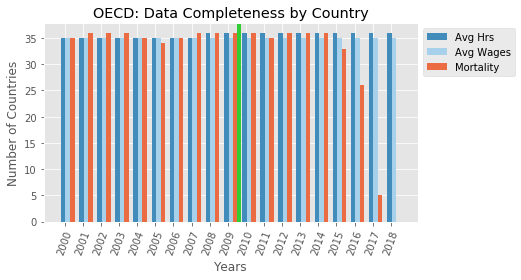

In [16]:
# to plot the years and countries data available


x = list(review_country_per_year['Year'])
y_1 = list(review_country_per_year['Avg. Work Hours (Annual)'])
y_2 = list(review_country_per_year['Avg. Wages (Annual)'])
y_3 = list(review_country_per_year['Mortality'])

x_pos = len(x)
ind = np.arange(x_pos) 


width  = 0.25

plt.bar(ind, y_1, width, label = 'Avg Hrs', color = '#418cba')
plt.bar(ind + width, y_2, width, label = 'Avg Wages', color = '#a7d1eb')
plt.bar(ind + (width *2),y_3,width, label = 'Mortality', color = '#eb6c42')

plt.axvline(x=9.7, color='limegreen',linewidth=4)

plt.xlabel("Years")
plt.ylabel("Number of Countries")
plt.title("OECD: Data Completeness by Country")

plt.xticks(ind + width/3, x,rotation=70)

plt.tight_layout()
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
plt.savefig('../charts/OECD_data_per_category.svg',format="svg",bbox_inches='tight')


plt.show()


The World Bank Data starts in 2010, which means that 10 years of the OECD data is irrelevant for comparison against the life ladder.
Since, our objective is to use all viable metrics from the 3 datasets together to compare against the Life Ladder (Happiness Index).

Also, Mortality becomes a metric is no longer being recorded since 2015. Thus it will be dropped from reviewed data.

In [17]:
oecd_data.tail()

,COU,Country,Year,Avg. Work Hours (Annual),Avg. Wages (Annual),Mortality
733,KOR,Korea,2003,NaN,31791.73083,244506.0
734,KOR,Korea,2004,NaN,32706.84627,244217.0
735,KOR,Korea,2005,NaN,33648.06616,243883.0
736,KOR,Korea,2006,NaN,33988.40175,242266.0
737,KOR,Korea,2007,NaN,34583.11330,244874.0


#### OECD & World Bank Data Consolidation

To fit the OECD dataset we need to remove the Morality Dataset & we are going to change the date frame from 2000-2018 to 2010-2017. 

In [18]:
oecd_data_df = oecd_data.drop(columns='Mortality')

In [19]:
oecd_data_df.tail()

,COU,Country,Year,Avg. Work Hours (Annual),Avg. Wages (Annual)
733,KOR,Korea,2003,NaN,31791.73083
734,KOR,Korea,2004,NaN,32706.84627
735,KOR,Korea,2005,NaN,33648.06616
736,KOR,Korea,2006,NaN,33988.40175
737,KOR,Korea,2007,NaN,34583.11330


In [20]:
## reducing OECD data for 2010 - 2017
time_span =  list(range(2010,2018))
time_span

[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]

In [21]:
# applying date range to dataframe
oecd_final_df = oecd_data_df[oecd_data_df['Year'].isin(time_span)]
oecd_final_df.tail(20)

,COU,Country,Year,Avg. Work Hours (Annual),Avg. Wages (Annual)
687,LTU,Lithuania,2014,1599.0,21367.70885
688,LTU,Lithuania,2015,1622.0,22741.69964
689,LTU,Lithuania,2016,1644.0,23933.49993
690,LTU,Lithuania,2017,1608.0,25207.13875
702,LVA,Latvia,2010,1738.0,18174.85913
703,LVA,Latvia,2011,1753.0,17541.35961
704,LVA,Latvia,2012,1738.0,18272.87632
705,LVA,Latvia,2013,1732.0,19151.96466
706,LVA,Latvia,2014,1741.0,20429.45208
707,LVA,Latvia,2015,1708.0,22295.31473


In [22]:
# to review the revised data for incomplete indicators per country & year
oecd_data_review = oecd_final_df.groupby(['Country','Year'])['Avg. Work Hours (Annual)','Avg. Wages (Annual)'].mean().reset_index().round(0).sort_values(by='Avg. Work Hours (Annual)', ascending=False)

In [23]:
## reviewing the average of the two dependant variables 
oecd_data_review
## since Costa Rica has incomplete data, we'll remove that country from the reviewed data

,Country,Year,Avg. Work Hours (Annual),Avg. Wages (Annual)
41,Costa Rica,2011,2285.0,NaN
40,Costa Rica,2010,2243.0,NaN
42,Costa Rica,2012,2233.0,NaN
46,Costa Rica,2016,2205.0,NaN
47,Costa Rica,2017,2179.0,NaN
...,...,...,...,...
93,Germany,2015,1370.0,48035.0
92,Germany,2014,1367.0,47010.0
94,Germany,2016,1363.0,48710.0
91,Germany,2013,1363.0,46277.0


In [24]:
# removed Cost Rice from dataset due to incomplete data
oecd_final_df = oecd_final_df.loc[oecd_final_df['Country'] != 'Costa Rica'].reset_index(drop=True)
oecd_final_df

,COU,Country,Year,Avg. Work Hours (Annual),Avg. Wages (Annual)
0,AUS,Australia,2010,1699.94,52252.97944
1,AUS,Australia,2011,1699.92,53905.77401
2,AUS,Australia,2012,1692.55,54226.18948
3,AUS,Australia,2013,1689.38,53977.41911
4,AUS,Australia,2014,1683.27,54391.75744
...,...,...,...,...,...
275,LVA,Latvia,2013,1732.00,19151.96466
276,LVA,Latvia,2014,1741.00,20429.45208
277,LVA,Latvia,2015,1708.00,22295.31473
278,LVA,Latvia,2016,1709.00,23591.68628


In [25]:
# created a table to review total number of countries per metric by year
oecd_final_data_review = oecd_final_df.groupby('Year')['Avg. Work Hours (Annual)','Avg. Wages (Annual)'].count().reset_index()
oecd_final_data_review

,Year,Avg. Work Hours (Annual),Avg. Wages (Annual)
0,2010,35,35
1,2011,35,35
2,2012,35,35
3,2013,35,35
4,2014,35,35
5,2015,35,35
6,2016,35,35
7,2017,35,35


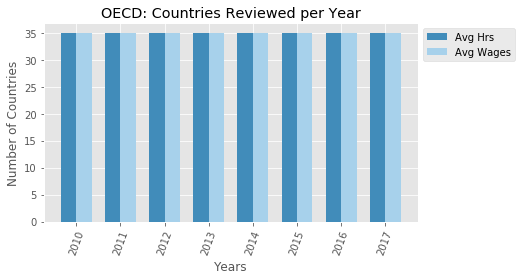

In [26]:
# to plot the years and countries data available
x = list(oecd_final_data_review['Year'])
y_1 = list(oecd_final_data_review['Avg. Work Hours (Annual)'])
y_2 = list(oecd_final_data_review['Avg. Wages (Annual)'])


x_pos = len(x)
ind = np.arange(x_pos) 
width  = 0.35

plt.bar(ind, y_1, width, label = 'Avg Hrs', color = '#418cba')
plt.bar(ind + width, y_2, width, label = 'Avg Wages', color = '#a7d1eb')


plt.xlabel("Years")
plt.ylabel("Number of Countries")
plt.title("OECD: Countries Reviewed per Year")

plt.xticks(ind + width/2,x,rotation=70)
# ax.set_ylim([30,40])

plt.tight_layout()
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
plt.savefig('../charts/OECD_data_per_category_revised_data.svg',format="svg",bbox_inches='tight')


plt.show()

<font color = 'blue'> To export final df to the resources folder </font>

In [27]:
oecd_final_df.to_csv('../resources/OECD_Machine_Learning_Report.csv', sep=',' , encoding= 'utf-8', index=False)

### <font color = 'green'> World Bank Data </font>

#### Importing Data

In [28]:
#to read csv of data
df= pd.read_csv('../../../WDIData.csv')

#to read csv of country names
df_country_names= pd.read_csv('../data/WDI_Country_Code_and_Names.csv',encoding = "ISO-8859-1")


#to read csv of indicators
df_list_indicators = pd.read_csv('../data/WDI_list_of_reviewed_indicators.csv')

#### Data Cleaning

In [29]:
#to grab the headers of the dataset
df_headers=list(df.columns.values)

#only pull the headers that are years
df_years = df_headers[-59:]

#only select previous years before 2010
df_years_drop = df_years[0:50]
#to make column '2018' a list
df_years_drop_2018 = list([df_years[-1]])

# to combine lists of years into 1 drop line
df_drop = df_years_drop + df_years_drop_2018

#to drop the years and create a summarized df
df_columns_removed = df.drop(df_drop,axis=1)
df_columns_removed.head()

,Country Name,Country Code,Indicator Name,Indicator Code,2010,2011,2012,2013,2014,2015,2016,2017
0,Arab World,ARB,"2005 PPP conversion factor, GDP (LCU per inter...",PA.NUS.PPP.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"2005 PPP conversion factor, private consumptio...",PA.NUS.PRVT.PP.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,82.407647,82.827636,83.169227,83.587141,83.954293,84.230630,84.570425,NaN
3,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,86.136134,86.782683,87.288244,88.389705,88.076774,88.517967,88.768654,NaN
4,Arab World,ARB,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,74.543489,75.770972,76.772916,78.839139,77.487377,78.564439,78.958780,NaN


Assigning Country Code

In [30]:
#to preview df_country_names
df_country_names.head()

#make a list of country short name
country_short_names = list(df_country_names['Short Name'])

#filter df by short names list
df_filter_cols_nd_cols_rem = df_columns_removed.loc[df_columns_removed['Country Name'].isin(country_short_names)]

In [31]:
df_filter_cols_nd_cols_rem.head()

,Country Name,Country Code,Indicator Name,Indicator Code,2010,2011,2012,2013,2014,2015,2016,2017
75153,Afghanistan,AFG,"2005 PPP conversion factor, GDP (LCU per inter...",PA.NUS.PPP.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75154,Afghanistan,AFG,"2005 PPP conversion factor, private consumptio...",PA.NUS.PRVT.PP.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75155,Afghanistan,AFG,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,20.68,22.330000,24.08,26.170000,27.99,30.1,32.440000,NaN
75156,Afghanistan,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,42.70,43.222019,69.10,67.259552,89.50,71.5,84.137138,NaN
75157,Afghanistan,AFG,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,32.40,33.380110,63.80,58.423667,87.80,64.2,78.961074,NaN


Filter indicators

In [32]:
headers= list(df_filter_cols_nd_cols_rem.iloc[:,4:].columns)
headers

['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']

In [33]:
df_list_indicators.head()

,Indicator Name
0,GDP (constant 2010 US$)
1,Population density (people per sq. km of land ...
2,"Literacy rate, adult total (% of people ages 1..."
3,"Probability of dying at age 5-14 years (per 1,..."
4,GINI index (World Bank estimate)


In [34]:
indicators =  list(df_list_indicators['Indicator Name'])
print(indicators)

#filter by indicators
df_countries_indiciator = df_filter_cols_nd_cols_rem.loc[df_filter_cols_nd_cols_rem['Indicator Name'].isin(indicators)]

#remove unnessecary columns
df_wdi = df_countries_indiciator.drop(columns='Indicator Code')

['GDP (constant 2010 US$)', 'Population density (people per sq. km of land area)', 'Literacy rate, adult total (% of people ages 15 and above)', 'Probability of dying at age 5-14 years (per 1,000 children age 5)', 'GINI index (World Bank estimate)']


#### Reshaping Data

In [35]:
df_wdi[['Country Code','Country Name','Indicator Name','2010']].head()

,Country Code,Country Name,Indicator Name,2010
75666,AFG,Afghanistan,GDP (constant 2010 US$),1.585657e+10
75693,AFG,Afghanistan,GINI index (World Bank estimate),NaN
75928,AFG,Afghanistan,"Literacy rate, adult total (% of people ages 1...",NaN
76284,AFG,Afghanistan,Population density (people per sq. km of land ...,4.411844e+01
76438,AFG,Afghanistan,"Probability of dying at age 5-14 years (per 1,...",1.150000e+01


#### To create annual reports for the Indicators

In [36]:
world_bank_dataframe = []

for year in headers:
    wbd = df_wdi[['Country Code','Country Name','Indicator Name',year]]
    
    # to reshape the data
    wbd_pivot_table = pd.pivot_table(wbd, values=year, index=['Country Code','Country Name'], columns=['Indicator Name'], aggfunc= np.sum)
    wbd_pivot_table.reset_index()
    
    # data cleaning
    wbd_pivot_table = wbd_pivot_table.dropna(axis=0, how='all').reset_index()
    
    #rename columns
    wbd_pivot_table =  wbd_pivot_table.rename(columns={'Country Code':'COU','Country Name':'Country'})
    
    # add year column
    wbd_pivot_table['Year'] = year
    
    # append to list
    world_bank_dataframe.append(wbd_pivot_table)
    
    print(f"Completed world bank data pivot table for {year}")

Completed world bank data pivot table for 2010
Completed world bank data pivot table for 2011
Completed world bank data pivot table for 2012
Completed world bank data pivot table for 2013
Completed world bank data pivot table for 2014
Completed world bank data pivot table for 2015
Completed world bank data pivot table for 2016
Completed world bank data pivot table for 2017


In [37]:
world_bank_dataframe[0].head()

Indicator Name,COU,Country,GDP (constant 2010 US$),GINI index (World Bank estimate),"Literacy rate, adult total (% of people ages 15 and above)",Population density (people per sq. km of land area),"Probability of dying at age 5-14 years (per 1,000 children age 5)",Year
0,ABW,Aruba,2.390503e+09,0.0,96.822639,564.827778,0.0,2010
1,AFG,Afghanistan,1.585657e+10,0.0,0.000000,44.118443,11.5,2010
2,AGO,Angola,8.379950e+10,0.0,0.000000,18.744791,23.3,2010
3,ALB,Albania,1.192696e+10,0.0,0.000000,106.314635,2.8,2010
4,AND,Andorra,3.355695e+09,0.0,0.000000,179.678723,1.0,2010


In [38]:
#to concat all df
world_bank_df = pd.concat([world_bank_dataframe[0],world_bank_dataframe[1],world_bank_dataframe[2],world_bank_dataframe[3],world_bank_dataframe[4],world_bank_dataframe[6],world_bank_dataframe[7]],ignore_index=True)
world_bank_df.tail()

Indicator Name,COU,Country,GDP (constant 2010 US$),GINI index (World Bank estimate),"Literacy rate, adult total (% of people ages 15 and above)",Population density (people per sq. km of land area),"Probability of dying at age 5-14 years (per 1,000 children age 5)",Year
1374,WSM,Samoa,7.583057e+08,0.0,0.0,69.413428,3.5,2017
1375,XKX,Kosovo,7.430487e+09,29.0,0.0,168.154680,0.0,2017
1376,ZAF,South Africa,4.268130e+11,0.0,0.0,46.754285,7.5,2017
1377,ZMB,Zambia,2.795729e+10,0.0,0.0,22.994834,13.5,2017
1378,ZWE,Zimbabwe,1.798558e+10,0.0,0.0,42.729492,14.1,2017


In [39]:
world_bank_df.tail()

Indicator Name,COU,Country,GDP (constant 2010 US$),GINI index (World Bank estimate),"Literacy rate, adult total (% of people ages 15 and above)",Population density (people per sq. km of land area),"Probability of dying at age 5-14 years (per 1,000 children age 5)",Year
1374,WSM,Samoa,7.583057e+08,0.0,0.0,69.413428,3.5,2017
1375,XKX,Kosovo,7.430487e+09,29.0,0.0,168.154680,0.0,2017
1376,ZAF,South Africa,4.268130e+11,0.0,0.0,46.754285,7.5,2017
1377,ZMB,Zambia,2.795729e+10,0.0,0.0,22.994834,13.5,2017
1378,ZWE,Zimbabwe,1.798558e+10,0.0,0.0,42.729492,14.1,2017


In [40]:
world_bank_df['Year'] = world_bank_df['Year'].astype(int)

In [41]:
world_bank_df.tail()

Indicator Name,COU,Country,GDP (constant 2010 US$),GINI index (World Bank estimate),"Literacy rate, adult total (% of people ages 15 and above)",Population density (people per sq. km of land area),"Probability of dying at age 5-14 years (per 1,000 children age 5)",Year
1374,WSM,Samoa,7.583057e+08,0.0,0.0,69.413428,3.5,2017
1375,XKX,Kosovo,7.430487e+09,29.0,0.0,168.154680,0.0,2017
1376,ZAF,South Africa,4.268130e+11,0.0,0.0,46.754285,7.5,2017
1377,ZMB,Zambia,2.795729e+10,0.0,0.0,22.994834,13.5,2017
1378,ZWE,Zimbabwe,1.798558e+10,0.0,0.0,42.729492,14.1,2017


<font color='Green'> To review data </font>

In [42]:
review_col_val = world_bank_df.iloc[:,2:7]
print('=======Values per Column=============')
column_values = review_col_val[review_col_val > 0].count()
column_values

# of the data collected, GINI index and Literacy Rate are the indicators with the least amount of values
# we'll drop them from reviewed indicators for the larger model

=======Values per Column=============


Indicator Name
GDP (constant 2010 US$)                                              1273
GINI index (World Bank estimate)                                      437
Literacy rate, adult total (% of people ages 15 and above)            258
Population density (people per sq. km of land area)                  1367
Probability of dying at age 5-14 years (per 1,000 children age 5)     350
dtype: int64

Even though all the countries have data, there are many countries with indicators that have no data provided. 

#### Reorganize & Reformat Dataframe

In [43]:
max_value = column_values.values.max()

# calculated the rows with data available less than 75% of the max data available. 
## use this index as a list of columns to drop
columns_with_low_data = list(column_values[column_values < (max_value*.75)].index)
columns_with_low_data

['GINI index (World Bank estimate)',
 'Literacy rate, adult total (% of people ages 15 and above)',
 'Probability of dying at age 5-14 years (per 1,000 children age 5)']

In [44]:
world_bank_ml_df = world_bank_df.drop(columns=columns_with_low_data)
world_bank_ml_df.tail()

Indicator Name,COU,Country,GDP (constant 2010 US$),Population density (people per sq. km of land area),Year
1374,WSM,Samoa,7.583057e+08,69.413428,2017
1375,XKX,Kosovo,7.430487e+09,168.154680,2017
1376,ZAF,South Africa,4.268130e+11,46.754285,2017
1377,ZMB,Zambia,2.795729e+10,22.994834,2017
1378,ZWE,Zimbabwe,1.798558e+10,42.729492,2017


In [45]:
# to reposition columns
cols_part1 = list(world_bank_ml_df.iloc[:,:2].columns)
cols_part2 =list(world_bank_ml_df.iloc[:,2:4].columns)

move = ['Year']


final_arrangement = cols_part1 + move + cols_part2
print(final_arrangement)
world_bank_ml_df = world_bank_ml_df[final_arrangement]

['COU', 'Country', 'Year', 'GDP (constant 2010 US$)', 'Population density (people per sq. km of land area)']


In [46]:
world_bank_ml_df.dtypes

Indicator Name
COU                                                     object
Country                                                 object
Year                                                     int32
GDP (constant 2010 US$)                                float64
Population density (people per sq. km of land area)    float64
dtype: object

In [47]:
review_country_per_year = world_bank_ml_df.groupby('Country')[list(world_bank_ml_df.iloc[:,3:].columns)].mean().round(0).reset_index()


print(review_country_per_year.dtypes)

# order of operations
## first I reviewed the column and values that equal to zero
## then I wanted the values from the country column
## made those countries into a list
countries_to_drop_pop = list(review_country_per_year.loc[review_country_per_year['Population density (people per sq. km of land area)'] < 1.00]['Country'])
countries_to_drop_gdp = list(review_country_per_year.loc[review_country_per_year['GDP (constant 2010 US$)'] < 1.00]['Country'])

# # used set before creating the list to remove duplicate country names
countries_to_drop = list(set(countries_to_drop_pop+countries_to_drop_gdp))
countries_to_drop

Indicator Name
Country                                                 object
GDP (constant 2010 US$)                                float64
Population density (people per sq. km of land area)    float64
dtype: object


['South Sudan',
 'New Caledonia',
 'Sint Maarten (Dutch part)',
 'Gibraltar',
 'Somalia',
 'British Virgin Islands',
 'Turks and Caicos Islands',
 'Greenland',
 'St. Martin (French part)',
 'French Polynesia',
 'Cayman Islands',
 'Channel Islands']

In [48]:
# this final dataframe only contains countries with full data
world_bank_ml_df = world_bank_ml_df.loc[~world_bank_ml_df['Country'].isin(countries_to_drop)].reset_index(drop=True)


In [49]:
#sort columns by country & year
## reset index
world_bank_ml_df = world_bank_ml_df.sort_values(by=['Country','Year'])

In [50]:
# we can see here that all the zero values are removed
world_bank_ml_df.describe().round(2)

Indicator Name,Year,GDP (constant 2010 US$),Population density (people per sq. km of land area)
count,1295.00,1.295000e+03,1295.00
mean,2013.29,3.640914e+11,447.69
std,2.37,1.451560e+12,2097.53
min,2010.00,0.000000e+00,0.00
25%,2011.00,5.200875e+09,35.31
50%,2013.00,2.492672e+10,86.53
75%,2016.00,1.621090e+11,208.49
max,2017.00,1.734860e+13,20479.18


In [51]:
world_bank_ml_df.reset_index(drop=True)

Indicator Name,COU,Country,Year,GDP (constant 2010 US$),Population density (people per sq. km of land area)
0,AFG,Afghanistan,2010,1.585657e+10,44.118443
1,AFG,Afghanistan,2011,1.592418e+10,45.505314
2,AFG,Afghanistan,2012,1.795488e+10,47.019205
3,AFG,Afghanistan,2013,1.896048e+10,48.604123
4,AFG,Afghanistan,2014,1.947707e+10,50.176179
...,...,...,...,...,...
1290,ZWE,Zimbabwe,2012,1.604247e+10,38.027210
1291,ZWE,Zimbabwe,2013,1.636164e+10,38.915616
1292,ZWE,Zimbabwe,2014,1.675054e+10,39.838891
1293,ZWE,Zimbabwe,2016,1.717755e+10,41.748383


In [52]:
review_wb_data = world_bank_ml_df.groupby('Year')['GDP (constant 2010 US$)','Population density (people per sq. km of land area)'].count().reset_index()
review_wb_data

Indicator Name,Year,GDP (constant 2010 US$),Population density (people per sq. km of land area)
0,2010,185,185
1,2011,185,185
2,2012,185,185
3,2013,185,185
4,2014,185,185
5,2016,185,185
6,2017,185,185


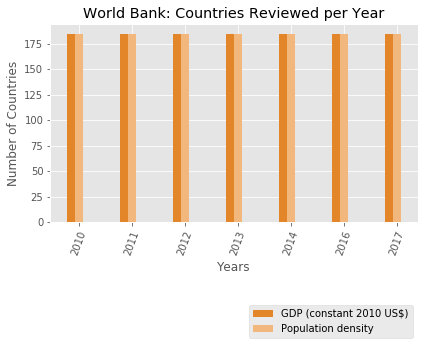

In [53]:
# to plot the years and countries data available

x = list(review_wb_data['Year'])
y_0 = list(review_wb_data['GDP (constant 2010 US$)'])
y_1 = list(review_wb_data['Population density (people per sq. km of land area)'])
# y_2 = list(review_country_per_year_round2[columns_to_review[2]])
# y_3 = list(review_country_per_year_round2[columns_to_review[3]])

x_pos = len(x)
ind = np.arange(x_pos) 


width  = 0.15

plt.bar(ind, y_0, width, label = 'GDP (constant 2010 US$)', color = '#e38629')
plt.bar(ind + width, y_1, width, label = 'Population density', color = '#f2b77c')
# plt.bar(ind + (width *2), y_2,width, label = columns_to_review[2], color = 'orange')
# plt.bar(ind + (width *3), y_3,width, label = columns_to_review[3], color = 'red')



plt.xlabel("Years")
plt.ylabel("Number of Countries")
plt.title("World Bank: Countries Reviewed per Year")

plt.xticks(ind + width, x,rotation=70)

plt.tight_layout()
plt.legend(bbox_to_anchor=(1, -.5), loc='center right', ncol=1)
plt.savefig('../charts/World_Bank_Data_per_year.svg',format="svg",bbox_inches='tight')


plt.show()


In [54]:
world_bank_ml_df.to_csv('../resources/World_Bank_Machine_Learning_Report.csv', sep=',' , encoding= 'utf-8', index=False)

#### <font color='purple'> To Merge OECD and World Data Reports </font>

In [55]:
oecd_and_world_bank_df = pd.merge(oecd_final_df, world_bank_ml_df, on=['COU','Country','Year'], how='inner')

In [56]:
oecd_and_world_bank_df.tail()

,COU,Country,Year,Avg. Work Hours (Annual),Avg. Wages (Annual),GDP (constant 2010 US$),Population density (people per sq. km of land area)
233,LVA,Latvia,2012,1738.0,18272.87632,2.629302e+10,32.716613
234,LVA,Latvia,2013,1732.0,19151.96466,2.693190e+10,32.362872
235,LVA,Latvia,2014,1741.0,20429.45208,2.743236e+10,32.064683
236,LVA,Latvia,2016,1709.0,23591.68628,2.883070e+10,31.513943
237,LVA,Latvia,2017,1695.0,24633.97485,3.016743e+10,31.235896


In [57]:
list_of_countries_reviewed_oecd_and_wb = list(set(oecd_and_world_bank_df['Country']))
list_of_countries_reviewed_oecd_and_wb

['Canada',
 'Iceland',
 'Netherlands',
 'Japan',
 'Denmark',
 'Poland',
 'Hungary',
 'France',
 'Lithuania',
 'Mexico',
 'Ireland',
 'Germany',
 'Greece',
 'Israel',
 'Luxembourg',
 'Chile',
 'Slovenia',
 'Belgium',
 'Portugal',
 'Switzerland',
 'Norway',
 'Spain',
 'United Kingdom',
 'Slovak Republic',
 'Finland',
 'Sweden',
 'Latvia',
 'Austria',
 'United States',
 'Australia',
 'Italy',
 'Czech Republic',
 'New Zealand',
 'Estonia']

In [58]:
oecd_and_world_bank_df.describe().round(0)

,Year,Avg. Work Hours (Annual),Avg. Wages (Annual),GDP (constant 2010 US$),Population density (people per sq. km of land area)
count,238.0,238.0,238.0,2.380000e+02,238.0
mean,2013.0,1675.0,39603.0,1.328471e+12,128.0
std,2.0,176.0,13510.0,2.850843e+12,123.0
min,2010.0,1360.0,16029.0,1.368369e+10,3.0
25%,2011.0,1533.0,25807.0,1.588070e+11,31.0
50%,2013.0,1701.0,41332.0,3.756890e+11,102.0
75%,2016.0,1773.0,49881.0,1.276185e+12,202.0
max,2017.0,2150.0,65891.0,1.734860e+13,508.0


### <font color='magenta'> UN Happiness Report </font>

In [59]:
#to read csv un happiness data names
un_happiness_report = pd.read_csv('../data/world_happiness_report_2019_original_file.csv',encoding = "ISO-8859-1")

In [60]:
# years is from earlier in the report
print(f"Time Span of prior data reports: {time_span}")
print(f"Years as strings from prior data reports: {headers}")

Time Span of prior data reports: [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]
Years as strings from prior data reports: ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']


In [61]:
un_happiness_report = un_happiness_report.rename(columns={'Country name':'Country'})

In [62]:
un_happiness_report.head()

,COU,Country,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,...,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-16","gini of household income reported in Gallup, by wp5-year","Most people can be trusted, Gallup","Most people can be trusted, WVS round 1981-1984","Most people can be trusted, WVS round 1989-1993","Most people can be trusted, WVS round 1994-1998","Most people can be trusted, WVS round 1999-2004","Most people can be trusted, WVS round 2005-2009","Most people can be trusted, WVS round 2010-2014"
0,AFG,Afghanistan,2008,3.723590,7.168690,0.450662,50.799999,0.718114,0.177889,0.881686,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,2009,4.401778,7.333790,0.552308,51.200001,0.678896,0.200178,0.850035,...,NaN,NaN,0.441906,0.286315,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Afghanistan,2010,4.758381,7.386629,0.539075,51.599998,0.600127,0.134353,0.706766,...,NaN,NaN,0.327318,0.275833,NaN,NaN,NaN,NaN,NaN,NaN
3,AFG,Afghanistan,2011,3.831719,7.415019,0.521104,51.919998,0.495901,0.172137,0.731109,...,NaN,NaN,0.336764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AFG,Afghanistan,2012,3.782938,7.517126,0.520637,52.240002,0.530935,0.244273,0.775620,...,NaN,NaN,0.344540,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
un_happiness_report.dtypes

COU                                                          object
Country                                                      object
Year                                                          int64
Life Ladder                                                 float64
Log GDP per capita                                          float64
Social support                                              float64
Healthy life expectancy at birth                            float64
Freedom to make life choices                                float64
Generosity                                                  float64
Perceptions of corruption                                   float64
Positive affect                                             float64
Negative affect                                             float64
Confidence in national government                           float64
Democratic Quality                                          float64
Delivery Quality                                

In [64]:
#adjust world happiness report to the time span of the other reports
un_happiness_report = un_happiness_report.loc[un_happiness_report['Year'].isin(time_span)]

<font color='blue'> Reorganize & Reformat Dataframe </font>

In [65]:
count_values_whr = un_happiness_report.count()
count_values_whr

COU                                                         1126
Country                                                     1126
Year                                                        1126
Life Ladder                                                 1126
Log GDP per capita                                          1108
Social support                                              1116
Healthy life expectancy at birth                            1103
Freedom to make life choices                                1108
Generosity                                                  1090
Perceptions of corruption                                   1055
Positive affect                                             1113
Negative affect                                             1117
Confidence in national government                           1000
Democratic Quality                                          1118
Delivery Quality                                            1118
Standard deviation of lad

In [66]:
max_value = count_values_whr.values.max()

# calculated the rows with data available less than 80% of the max data available. 
## use this index as a list of columns to drop
columns_with_low_data_whr = list(count_values_whr[count_values_whr < (max_value*.80)].index)
columns_with_low_data_whr

['GINI index (World Bank estimate)',
 'Most people can be trusted, Gallup',
 'Most people can be trusted, WVS round 1981-1984',
 'Most people can be trusted, WVS round 1989-1993',
 'Most people can be trusted, WVS round 1994-1998',
 'Most people can be trusted, WVS round 1999-2004',
 'Most people can be trusted, WVS round 2005-2009',
 'Most people can be trusted, WVS round 2010-2014']

In [67]:
un_happiness_report = un_happiness_report.drop(columns = columns_with_low_data_whr)

In [68]:
un_happiness_report.count()

COU                                                         1126
Country                                                     1126
Year                                                        1126
Life Ladder                                                 1126
Log GDP per capita                                          1108
Social support                                              1116
Healthy life expectancy at birth                            1103
Freedom to make life choices                                1108
Generosity                                                  1090
Perceptions of corruption                                   1055
Positive affect                                             1113
Negative affect                                             1117
Confidence in national government                           1000
Democratic Quality                                          1118
Delivery Quality                                            1118
Standard deviation of lad

In [69]:
un_happiness_report.head()

,COU,Country,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,"GINI index (World Bank estimate), average 2000-16","gini of household income reported in Gallup, by wp5-year"
2,AFG,Afghanistan,2010,4.758381,7.386629,0.539075,51.599998,0.600127,0.134353,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803,NaN,0.327318
3,AFG,Afghanistan,2011,3.831719,7.415019,0.521104,51.919998,0.495901,0.172137,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942,NaN,0.336764
4,AFG,Afghanistan,2012,3.782938,7.517126,0.520637,52.240002,0.530935,0.244273,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367,NaN,0.344540
5,AFG,Afghanistan,2013,3.572100,7.522238,0.483552,52.560001,0.577955,0.070403,0.823204,0.620585,0.273328,0.482847,-1.879709,-1.403036,1.223690,0.342569,NaN,0.304368
6,AFG,Afghanistan,2014,3.130896,7.516955,0.525568,52.880001,0.508514,0.113184,0.871242,0.531691,0.374861,0.409048,-1.773257,-1.312503,1.395396,0.445686,NaN,0.413974


In [70]:
# tp get all the dependant variables together
whr_dependent_var = list(un_happiness_report.iloc[:,3:].columns)
whr_dependent_var

['Life Ladder',
 'Log GDP per capita',
 'Social support',
 'Healthy life expectancy at birth',
 'Freedom to make life choices',
 'Generosity',
 'Perceptions of corruption',
 'Positive affect',
 'Negative affect',
 'Confidence in national government',
 'Democratic Quality',
 'Delivery Quality',
 'Standard deviation of ladder by country-year',
 'Standard deviation/Mean of ladder by country-year',
 'GINI index (World Bank estimate), average 2000-16',
 'gini of household income reported in Gallup, by wp5-year']

In [71]:
# count number of countries per year
countries_data = un_happiness_report.groupby('Country')[whr_dependent_var].count()
countries_data.head()

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,"GINI index (World Bank estimate), average 2000-16","gini of household income reported in Gallup, by wp5-year"
Country,,,,,,,,,,,,,,,,
Afghanistan,8,8,8,8,8,8,8,8,8,8,8,8,8,8,0,8
Albania,8,8,8,8,8,8,8,8,8,6,8,8,8,8,8,8
Algeria,6,6,5,6,4,4,4,5,5,0,6,6,6,6,6,6
Angola,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,2
Argentina,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8


In [72]:
countries_data.dtypes

Life Ladder                                                 int64
Log GDP per capita                                          int64
Social support                                              int64
Healthy life expectancy at birth                            int64
Freedom to make life choices                                int64
Generosity                                                  int64
Perceptions of corruption                                   int64
Positive affect                                             int64
Negative affect                                             int64
Confidence in national government                           int64
Democratic Quality                                          int64
Delivery Quality                                            int64
Standard deviation of ladder by country-year                int64
Standard deviation/Mean of ladder by country-year           int64
GINI index (World Bank estimate), average 2000-16           int64
gini of ho

In [73]:
countries_data['complete'] = countries_data.sum(axis=1)
countries_data

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,"GINI index (World Bank estimate), average 2000-16","gini of household income reported in Gallup, by wp5-year",complete
Country,,,,,,,,,,,,,,,,,
Afghanistan,8,8,8,8,8,8,8,8,8,8,8,8,8,8,0,8,120
Albania,8,8,8,8,8,8,8,8,8,6,8,8,8,8,8,8,126
Algeria,6,6,5,6,4,4,4,5,5,0,6,6,6,6,6,6,81
Angola,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,2,62
Argentina,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,128
Vietnam,8,8,7,8,5,7,5,7,7,4,8,8,8,8,8,8,114
Yemen,8,7,8,8,8,7,6,8,8,8,8,8,8,8,8,8,124


In [74]:
incomplete_countries_table = countries_data.loc[countries_data['complete'] < 128]
incomplete_countries_table

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,"GINI index (World Bank estimate), average 2000-16","gini of household income reported in Gallup, by wp5-year",complete
Country,,,,,,,,,,,,,,,,,
Afghanistan,8,8,8,8,8,8,8,8,8,8,8,8,8,8,0,8,120
Albania,8,8,8,8,8,8,8,8,8,6,8,8,8,8,8,8,126
Algeria,6,6,5,6,4,4,4,5,5,0,6,6,6,6,6,6,81
Angola,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,2,62
Bahrain,8,8,7,8,7,5,4,7,7,0,8,8,8,8,0,8,101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
United Arab Emirates,8,8,7,8,7,5,1,6,7,0,8,8,8,8,0,8,97
Uzbekistan,8,8,8,8,7,8,7,8,8,3,8,8,8,8,8,8,121
Vietnam,8,8,7,8,5,7,5,7,7,4,8,8,8,8,8,8,114


In [75]:
incomplete_countries = list(incomplete_countries_table.index)
incomplete_countries

['Afghanistan',
 'Albania',
 'Algeria',
 'Angola',
 'Bahrain',
 'Bangladesh',
 'Belarus',
 'Belize',
 'Benin',
 'Bhutan',
 'Bosnia and Herzegovina',
 'Brazil',
 'Burundi',
 'Cambodia',
 'Central African Republic',
 'China',
 'Comoros',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Croatia',
 'Djibouti',
 'Egypt',
 'Estonia',
 'Ethiopia',
 'Gabon',
 'Gambia',
 'Ghana',
 'Guinea',
 'Hong Kong S.A.R. of China',
 'Iceland',
 'Iran',
 'Iraq',
 'Ivory Coast',
 'Jamaica',
 'Japan',
 'Jordan',
 'Kosovo',
 'Kuwait',
 'Laos',
 'Latvia',
 'Lebanon',
 'Lesotho',
 'Liberia',
 'Libya',
 'Macedonia',
 'Madagascar',
 'Malawi',
 'Malaysia',
 'Malta',
 'Mauritania',
 'Mauritius',
 'Mongolia',
 'Montenegro',
 'Morocco',
 'Mozambique',
 'Myanmar',
 'Namibia',
 'New Zealand',
 'Nigeria',
 'North Cyprus',
 'Norway',
 'Oman',
 'Palestinian Territories',
 'Philippines',
 'Poland',
 'Qatar',
 'Rwanda',
 'Saudi Arabia',
 'Serbia',
 'Sierra Leone',
 'Singapore',
 'Somalia',
 'Somaliland region',
 'South Korea',

In [76]:
# to review which countries have incomplete data, that are in the OECD & World Bank combined dataset
countries_to_analyze = list(set(list_of_countries_reviewed_oecd_and_wb).intersection(set(incomplete_countries)))

In [77]:
countries_to_analyze

['Switzerland',
 'Norway',
 'Estonia',
 'Iceland',
 'Japan',
 'New Zealand',
 'Latvia',
 'Poland']

In [78]:
whr_analyzed_countries = countries_data.filter(items = countries_to_analyze, axis=0).sort_values(by='complete')
whr_analyzed_countries

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,"GINI index (World Bank estimate), average 2000-16","gini of household income reported in Gallup, by wp5-year",complete
Country,,,,,,,,,,,,,,,,,
Switzerland,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,80
Norway,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,80
Iceland,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,80
Estonia,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,112
Latvia,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,112
Poland,8,8,8,8,8,8,7,8,8,8,8,8,8,8,0,8,119
New Zealand,8,8,8,8,8,8,8,8,8,8,8,8,8,8,0,8,120
Japan,8,8,8,8,8,7,8,8,8,8,8,8,8,8,8,8,127


In [79]:
review_of_table = un_happiness_report.loc[un_happiness_report['Country'].isin(countries_to_analyze)]
review_of_table

,COU,Country,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,"GINI index (World Bank estimate), average 2000-16","gini of household income reported in Gallup, by wp5-year"
470,EST,Estonia,2011,5.486820,10.108185,0.908713,66.959999,0.735225,-0.171402,0.686784,0.651386,0.205158,0.417540,0.872384,1.176006,1.951516,0.355673,0.332462,0.381159
471,EST,Estonia,2012,5.363928,10.153934,0.889455,67.220001,0.696826,-0.196030,0.792853,0.647360,0.198967,0.272976,0.874195,1.156192,1.961893,0.365757,0.332462,0.381732
472,EST,Estonia,2013,5.367446,10.176674,0.900722,67.480003,0.753559,-0.205495,0.726356,0.702256,0.199018,0.260638,0.932532,1.202389,1.825385,0.340084,0.332462,0.358571
473,EST,Estonia,2014,5.555983,10.207794,0.917102,67.739998,0.773327,-0.157700,0.652447,0.680431,0.203439,0.414986,0.975284,1.342396,1.858401,0.334486,0.332462,0.363079
474,EST,Estonia,2015,5.628909,10.223742,0.917930,68.000000,0.814692,-0.168343,0.568734,0.723338,0.182695,0.336690,0.903851,1.340699,1.893060,0.336310,0.332462,0.405379
475,EST,Estonia,2016,5.649675,10.243875,0.937715,68.199997,0.842771,-0.153378,0.639085,0.726255,0.176869,0.339834,0.940918,1.323766,1.753086,0.310299,0.332462,0.343597
476,EST,Estonia,2017,5.938396,10.291510,0.935686,68.400002,0.861749,-0.104598,0.668402,0.805218,0.160164,0.405946,0.936888,1.320734,1.851840,0.311842,0.332462,0.396600
636,ISL,Iceland,2012,7.590660,10.594924,0.978965,72.760002,0.904655,0.239700,0.758586,0.899718,0.157154,0.257336,1.343991,1.545395,1.569349,0.206747,0.280833,0.402890
637,ISL,Iceland,2013,7.501394,10.627644,0.967145,72.839996,0.923208,0.304013,0.712599,0.869971,0.156276,0.456566,1.363351,1.551135,1.568698,0.209121,0.280833,0.332604
638,ISL,Iceland,2015,7.498071,10.670074,0.980283,73.000000,0.940485,0.298926,0.638662,0.849021,0.179504,0.427228,1.342287,1.593127,1.687232,0.225022,0.280833,0.391597


We are making the assumption that each column will not have more than 1 NaN value, which appears to be the trend above.

<b> Results of the review:</b>

- We're going to remove the "GINI index (World Bank estimate), average 2000-16", from the larger model. 
- We will calculate the annual trend of the countries where it is missing one - two years of data the from the dataset.

- We will use those trends for later and more recent years values to calculate an estimated value.

- Once these trends are calculated, I will filter out the analyzed countries from the dataset and concat the results of the calculations for the dataset

In [80]:
un_happiness_report = un_happiness_report.drop(columns='GINI index (World Bank estimate), average 2000-16')

In [81]:
un_happiness_report.head()

,COU,Country,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,"gini of household income reported in Gallup, by wp5-year"
2,AFG,Afghanistan,2010,4.758381,7.386629,0.539075,51.599998,0.600127,0.134353,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803,0.327318
3,AFG,Afghanistan,2011,3.831719,7.415019,0.521104,51.919998,0.495901,0.172137,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942,0.336764
4,AFG,Afghanistan,2012,3.782938,7.517126,0.520637,52.240002,0.530935,0.244273,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367,0.344540
5,AFG,Afghanistan,2013,3.572100,7.522238,0.483552,52.560001,0.577955,0.070403,0.823204,0.620585,0.273328,0.482847,-1.879709,-1.403036,1.223690,0.342569,0.304368
6,AFG,Afghanistan,2014,3.130896,7.516955,0.525568,52.880001,0.508514,0.113184,0.871242,0.531691,0.374861,0.409048,-1.773257,-1.312503,1.395396,0.445686,0.413974


In [82]:
# from earlier in the code
whr_dependent_var.remove('GINI index (World Bank estimate), average 2000-16')
whr_dependent_var

['Life Ladder',
 'Log GDP per capita',
 'Social support',
 'Healthy life expectancy at birth',
 'Freedom to make life choices',
 'Generosity',
 'Perceptions of corruption',
 'Positive affect',
 'Negative affect',
 'Confidence in national government',
 'Democratic Quality',
 'Delivery Quality',
 'Standard deviation of ladder by country-year',
 'Standard deviation/Mean of ladder by country-year',
 'gini of household income reported in Gallup, by wp5-year']

#### Formula to calculate Nan values between annual data per column

In [83]:
analyzed_trends = []
applied_country = [] # to get a list of countries im the analyzed trends array

# Objective: Replace NaN values with estimate calculated value

for country in countries_to_analyze:
    for column in whr_dependent_var:
        
        country_review = un_happiness_report.loc[un_happiness_report['Country'] == country]


        col_nan_values_test = country_review[column].isnull().any() # equals true

        if (col_nan_values_test == True):
            
            column_values = list(country_review[column].values) # returns values of column where NaN exists

            index_nan = np.argwhere(np.isnan(column_values)).item()
            nan_values = column_values[index_nan] # to index nan
            
            ## List slicing ##
            index_value = [(index_nan + 1) if index_nan != 1 else index_nan][0]
            values_before_nan = column_values[:index_nan] if index_value != 1 else column_values[:index_nan]
            
            values_before_nan = column_values[:index_nan]# to index all values before nan
            
            # we take 40% of the len of the list to get a value that represents less than half of the values in the array
            # 40% is an arbitrary number; 
            ## Due to us having a max of 7 years of data for incomplete columns I kept the number large to at least incorporate the past 3 years
            # Using ~40% of the values in the list, we use that value as an index & add 1 to it, to account for the upper bound exlusion property of slicing.
            # Then we use the NaN index to slice the array for the current annual values in:'values_before_nan'
            index_current_years = int(round((len(values_before_nan)*.4),0)+1)
            
            # we index the values_before_nan annual data for current years for calc
            list_of_current_years_data = values_before_nan[:index_current_years]
            
            # calculate the difference between the values for the current years 
            list_of_diff = [t - s for s, t in zip(list_of_current_years_data, list_of_current_years_data[1:])]
            
            # calculate the average of the values in the list 
            estimated_variance_calc = reduce(lambda x, y: x + y, list_of_diff) / len(list_of_diff)

            # apply that estimate variance to the a percentage rate
            applied_variance_calc = (1 + estimated_variance_calc)
            
            # to review variance between prior yr and current value 
            before_nan_value = values_before_nan[-1]

            # last value before nan
            new_value_calc = (values_before_nan[-1] * applied_variance_calc)

            # to replace original nan value with new_value_calc
            country_review[column] = country_review[column].fillna(value= new_value_calc, limit=1)

            conclusion_test = country_review[column].isnull().any() # equals false
            
            # to append country dataframe to a list
            analyzed_trends.append(country_review)
            applied_country.append(country)
            
            print(f" Calculation performed for:{country} for {column}.")
            print('-----------------------------------------')
            print(f"Value Before NaN: {before_nan_value}")
            print(f"Applied Variance Calculation Value {applied_variance_calc}")
            print(f"NaN value calculated {new_value_calc}")
            print('==========================')
        else:
            continue


 Calculation performed for:Japan for Generosity.
-----------------------------------------
Value Before NaN: -0.06277260900000001
Applied Variance Calculation Value 1.088440933
NaN value calculated -0.06832427710680421
 Calculation performed for:Poland for Perceptions of corruption.
-----------------------------------------
Value Before NaN: 0.847753942
Applied Variance Calculation Value 1.003660043
NaN value calculated 0.8508567578811395


In [84]:
analyzed_trends[1]

,COU,Country,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,"gini of household income reported in Gallup, by wp5-year"
1221,POL,Poland,2010,5.887030,9.988317,0.955065,67.300003,0.794900,-0.004293,0.904697,0.736898,0.234237,0.333801,1.027466,0.700624,1.935959,0.328852,0.392158
1222,POL,Poland,2011,5.646205,10.036735,0.904579,67.459999,0.868149,-0.072977,0.907953,0.725360,0.223810,0.272376,1.049845,0.718041,1.960482,0.347221,0.367741
1223,POL,Poland,2012,5.875932,10.052688,0.935924,67.620003,0.811302,-0.032698,0.887896,0.787489,0.266747,0.268629,1.056877,0.769940,1.883933,0.320619,0.347640
1224,POL,Poland,2013,5.746132,10.067115,0.911935,67.779999,0.775931,-0.143368,0.915677,0.784124,0.241981,0.163588,0.985747,0.796118,1.911394,0.332640,0.299983
1225,POL,Poland,2014,5.750282,10.100167,0.923642,67.940002,0.875357,-0.070497,0.897742,0.776997,0.222644,0.252523,0.974027,0.839509,2.052379,0.356918,0.378064
1226,POL,Poland,2015,6.007022,10.138558,0.893090,68.099998,0.793462,-0.099410,0.810096,0.734383,0.240432,0.211428,0.957258,0.817675,1.876940,0.312458,0.362956
1227,POL,Poland,2016,6.162076,10.167230,0.917399,68.500000,0.870708,-0.097281,0.847754,0.776625,0.223536,0.382713,0.675346,0.756335,1.845849,0.299550,0.312158
1228,POL,Poland,2017,6.201268,10.211576,0.881854,68.900002,0.830843,-0.127978,0.850857,0.677436,0.203388,0.502480,0.651249,0.678493,1.627443,0.262437,0.260088


In [85]:
applied_country

['Japan', 'Poland']

In [86]:
un_happiness_report_unanalyzed_data = un_happiness_report.loc[~un_happiness_report['Country'].isin(applied_country)]
un_happiness_report_unanalyzed_data.tail()

,COU,Country,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,"gini of household income reported in Gallup, by wp5-year"
1698,ZWE,Zimbabwe,2013,4.690188,7.565154,0.799274,50.959999,0.575884,-0.079458,0.830937,0.711885,0.182288,0.527755,-1.026085,-1.526321,1.964805,0.418918,0.555439
1699,ZWE,Zimbabwe,2014,4.184451,7.562753,0.765839,52.380001,0.642034,-0.048634,0.820217,0.725214,0.239111,0.566209,-0.985267,-1.484067,2.079248,0.496899,0.601080
1700,ZWE,Zimbabwe,2015,3.703191,7.556052,0.735800,53.799999,0.667193,-0.097354,0.810457,0.715079,0.178861,0.590012,-0.893078,-1.357514,2.198865,0.593776,0.655137
1701,ZWE,Zimbabwe,2016,3.735400,7.538829,0.768425,54.400002,0.732971,-0.068105,0.723612,0.737636,0.208555,0.699344,-0.900649,-1.374650,2.776363,0.743257,0.596690
1702,ZWE,Zimbabwe,2017,3.638300,7.549491,0.754147,55.000000,0.752826,-0.069670,0.751208,0.806428,0.224051,0.682647,-0.988153,-1.350867,2.656848,0.730244,0.581484


In [87]:
# since there is only 2 dataframes to concat we'll concat all at once
un_happiness_report_analyzed_part_1 = pd.concat([un_happiness_report_unanalyzed_data,analyzed_trends[0],analyzed_trends[1]],ignore_index=True)
un_happiness_report_analyzed_part_1.tail()

,COU,Country,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,"gini of household income reported in Gallup, by wp5-year"
1121,POL,Poland,2013,5.746132,10.067115,0.911935,67.779999,0.775931,-0.143368,0.915677,0.784124,0.241981,0.163588,0.985747,0.796118,1.911394,0.332640,0.299983
1122,POL,Poland,2014,5.750282,10.100167,0.923642,67.940002,0.875357,-0.070497,0.897742,0.776997,0.222644,0.252523,0.974027,0.839509,2.052379,0.356918,0.378064
1123,POL,Poland,2015,6.007022,10.138558,0.893090,68.099998,0.793462,-0.099410,0.810096,0.734383,0.240432,0.211428,0.957258,0.817675,1.876940,0.312458,0.362956
1124,POL,Poland,2016,6.162076,10.167230,0.917399,68.500000,0.870708,-0.097281,0.847754,0.776625,0.223536,0.382713,0.675346,0.756335,1.845849,0.299550,0.312158
1125,POL,Poland,2017,6.201268,10.211576,0.881854,68.900002,0.830843,-0.127978,0.850857,0.677436,0.203388,0.502480,0.651249,0.678493,1.627443,0.262437,0.260088


In [88]:
# to create table
review_of_table_part_2 = un_happiness_report_analyzed_part_1.loc[un_happiness_report_analyzed_part_1['Country'].isin(countries_to_analyze)]
analyzed_countries_data_part_2 = review_of_table_part_2.groupby('Country')[whr_dependent_var].count()

# to create column to review complete data
analyzed_countries_data_part_2['Complete'] = analyzed_countries_data_part_2.sum(axis=1)
analyzed_countries_data_part_2 = analyzed_countries_data_part_2.reset_index().sort_values(by='Complete')

# filter table to show only incomplete countries
analyzed_countries_data_part_2 = analyzed_countries_data_part_2.loc[analyzed_countries_data_part_2['Complete'] < 120]

analyzed_countries_data_part_2

,Country,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,"gini of household income reported in Gallup, by wp5-year",Complete
1,Iceland,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,75
5,Norway,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,75
7,Switzerland,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,75
0,Estonia,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,105
3,Latvia,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,105


In [89]:
# to make a list of updated countries to analyze
countries_to_analyze_part_2 = list(analyzed_countries_data_part_2['Country'].values)
countries_to_analyze_part_2

['Iceland', 'Norway', 'Switzerland', 'Estonia', 'Latvia']

In [406]:
#### to iterate through countries in 'countries_to_analyze_part_2'
country_review_part_2 = un_happiness_report_analyzed_part_1.loc[un_happiness_report_analyzed_part_1['Country'] == 'Iceland']

# to get a list of data per country by annual row
data_row_per_country = country_review_part_2.to_dict('split')
# to index the data from the rows
data_per_country = data_row_per_country['data']
data_per_country

[['ISL',
  'Iceland',
  2012,
  7.590660095,
  10.59492397,
  0.978965282,
  72.76000214,
  0.9046545029999999,
  0.239700317,
  0.7585856320000001,
  0.899718463,
  0.157153815,
  0.257335573,
  1.34399128,
  1.545394659,
  1.569349289,
  0.20674741300000002,
  0.40288952],
 ['ISL',
  'Iceland',
  2013,
  7.501394272000001,
  10.62764359,
  0.967144907,
  72.83999634,
  0.9232077,
  0.304012835,
  0.712598741,
  0.869971037,
  0.15627557,
  0.456565946,
  1.363351345,
  1.551135063,
  1.5686975719999998,
  0.209120795,
  0.332603514],
 ['ISL',
  'Iceland',
  2015,
  7.498070717,
  10.67007351,
  0.980283201,
  73.0,
  0.94048512,
  0.298925996,
  0.638661802,
  0.849020839,
  0.179504439,
  0.42722812299999996,
  1.342286825,
  1.5931270119999998,
  1.687232494,
  0.225022212,
  0.391596675],
 ['ISL',
  'Iceland',
  2016,
  7.510034561,
  10.7283411,
  0.984940052,
  73.0,
  0.9516095520000001,
  0.278244555,
  0.719299555,
  0.873887897,
  0.158169165,
  0.36351829799999996,
  1.3588

#### Formula to calculate data for countries that are missing data for 2010 &/or  2011

In [400]:
analyzed_years_per_country = []


for country in countries_to_analyze_part_2:
       
    #### to iterate through countries in 'countries_to_analyze_part_2'
    country_review_part_2 = un_happiness_report_analyzed_part_1.loc[un_happiness_report_analyzed_part_1['Country'] == country]

    # to get a list of data per country by annual row
    data_row_per_country = country_review_part_2.to_dict('split')
    # to index the data from the rows
    data_per_country = data_row_per_country['data']


    ### to iterate through the data in the country and collect years that the data is present

    country_years = []

    for item in data_per_country:
        country_years.append(item[2])


    ### Below are variables that we will use to determine which years of data are missing 
    #### Also, to help gather annual data

    # Create a list of years with no data
    years_no_data = list(set(time_span) - set(country_years))
    print(years_no_data)

    for i in reversed(range(len(years_no_data))):
        
        # start at the end of the list of years with no data
        reviewed_element = years_no_data[i]

        print(reviewed_element)
        
        # we start at the end to fill the data from back to front
        ## we can use the calculated data for missing prior years calculations

        # calculate next element in list
        next_element_in_list = reviewed_element + 1

        print(next_element_in_list)
        
        try:
            
            # index the list at the next available year and get data from index to end of list
            index_of_year_to_start_review = country_years.index(next_element_in_list)
        
        except ValueError:
            
            data_row_per_country = analyzed_years_per_country[-1].to_dict('split')
            # to index the data from the rows
            data_per_country = data_row_per_country['data']
            
            print('Value Error Received')
        
        # then we take the array of data by country and index the years that have available data from our start year
        data_available = data_per_country[index_of_year_to_start_review:]

        # total columns available for loop
        columns_available = len(data_available[0])

        # to get country independent variable columns to create full row of details 
        data_available_indp_colms = data_available[0][:2]

        #### To iterate through years of data & calculate an average value for current years

        i = 3

        data_per_column = []
        column_data = []

        while i < columns_available:
            column_data.clear()
            for item in data_available:
                column_data.append(item[i]) 


            # calculate the difference between the values for the current years 
            list_of_diff = [t - s for s, t in zip(column_data, column_data[1:])]

            # calculate the average of the values in the list 
            estimated_variance_calc = reduce(lambda x, y: x + y, list_of_diff) / len(list_of_diff)

            # apply that estimate variance to the a percentage rate
            applied_variance_calc = (1 + estimated_variance_calc)

            # to review variance between prior yr and current value 
            value_of_one_year_ahead = column_data[0]

            print(f"old value: {value_of_one_year_ahead }")

            # last value before nan
            new_value_calc = (value_of_one_year_ahead / applied_variance_calc) ## we are dividing instead of multiplying b/c we are calculating the prior year

            print(f"new value: {new_value_calc}")

            data_per_column.append(new_value_calc)

            i += 1

        ### to create missing row of calculation
        missing_year_row = data_available_indp_colms + [reviewed_element] + data_per_column
        missing_year_row

        # to gather column headers
        column_headers = data_row_per_country['columns']
        column_headers

        # to make the values into a dictionary
        keys = column_headers
        values = missing_year_row
        missing_row_dict = dict(zip(keys, values))
        print(missing_row_dict)


        # to make a dataframe out of dictionary
        missing_row_df = pd.DataFrame(missing_row_dict, index=[0])

        #to concat new row to original table 
        analyzed_df = pd.concat([country_review_part_2,missing_row_df],ignore_index=True).sort_values(by='Year').reset_index(drop=True)
        
        analyzed_years_per_country.append(analyzed_df)

[2010, 2011, 2014]
2014
2015
old value: 7.498070717
new value: 7.580917964021123
old value: 10.67007351
new value: 10.275653246800923
old value: 0.980283201
new value: 0.9869601711191732
old value: 73.0
new value: 73.0
old value: 0.94048512
new value: 0.9412860753821198
old value: 0.298925996
new value: 0.30747413231855275
old value: 0.638661802
new value: 0.6116912397025062
old value: 0.849020839
new value: 0.8298376022309237
old value: 0.179504439
new value: 0.18236246253846985
old value: 0.42722812299999996
new value: 0.44093825632943234
old value: 1.342286825
new value: 1.3210129400097173
old value: 1.5931270119999998
new value: 1.6021681582677918
old value: 1.687232494
new value: 1.7368559098018725
old value: 0.225022212
new value: 0.22581088610093358
old value: 0.391596675
new value: 0.4035329313398118
{'COU': 'ISL', 'Country': 'Iceland', 'Year': 2014, 'Life Ladder': 7.580917964021123, 'Log GDP per capita': 10.275653246800923, 'Social support': 0.9869601711191732, 'Healthy life e

In [401]:
analyzed_years_per_country[-1]

,COU,Country,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,"gini of household income reported in Gallup, by wp5-year"
0,LVA,Latvia,2010,4.250584,9.516064,0.827894,50.937177,0.552038,-0.005283,0.955903,0.557698,0.221343,0.104507,0.519727,0.650279,1.943567,0.390261,0.331863
1,LVA,Latvia,2011,4.966812,9.892092,0.836042,64.860001,0.564464,-0.005148,0.934256,0.563278,0.221713,0.107237,0.528389,0.672904,1.912062,0.384968,0.333452
2,LVA,Latvia,2012,5.125025,9.944049,0.851195,65.120003,0.563812,-0.040608,0.894979,0.560013,0.232225,0.191220,0.614571,0.721495,1.890645,0.368905,0.321799
3,LVA,Latvia,2013,5.069770,9.978767,0.834023,65.379997,0.630508,-0.075946,0.836554,0.642102,0.227449,0.233800,0.682029,0.757290,1.719731,0.339213,0.305940
4,LVA,Latvia,2014,5.729115,10.006597,0.881256,65.639999,0.670653,-0.046076,0.803688,0.652273,0.225979,0.229045,0.668352,0.854488,1.962900,0.342618,0.406468
5,LVA,Latvia,2015,5.880598,10.044067,0.879372,65.900002,0.656393,-0.080377,0.808400,0.608380,0.228137,0.298912,0.645110,0.860310,1.725923,0.293494,0.368298
6,LVA,Latvia,2016,5.940446,10.075054,0.917074,66.199997,0.685299,-0.159757,0.867640,0.653751,0.231384,0.315261,0.660759,0.869054,1.705120,0.287036,0.384025
7,LVA,Latvia,2017,5.977818,10.129182,0.895099,66.500000,0.699520,-0.158590,0.798378,0.623313,0.231753,0.264001,0.628388,0.881661,1.814803,0.303590,0.362185


### <font color = 'orange'> To Combine OECD Data with UN Happiness Report </font>

In [ ]:
# to check to see if OECD has countries that UN report does not

oecd_cou_series= list(set(oecd_yearly_reports_df['COU']))
UN_cou_series= list(set(un_happiness_report['COU']))

print(f"OECD COU: {len(oecd_cou_series)}")
print(f"UN COU: {len(UN_cou_series)}")

same_cou = len(set(oecd_cou_series) & set(UN_cou_series))

print(f"Number countries that are the same {same_cou}")

In [ ]:
un_happiness_report.dtypes

In [ ]:
oecd_yearly_reports_df.dtypes

In [ ]:
oecd_yearly_reports_df.tail()

In [ ]:
oecd_report_df = pd.pivot_table(oecd_yearly_reports_df, values='Year', index=['COU','Country','Year'], columns=['Dataset'], aggfunc= np.sum)
oecd_report_df = oecd_report_df.reset_index()
oecd_report_df.head()

In [ ]:
# to merge OECD Data with UN Happiness Report
oecd_happiness_df = pd.merge(oecd_yearly_reports_df, un_happiness_report, on=['COU','Country','Year'], how='inner')
oecd_happiness_df['Year'] = pd.to_numeric(oecd_happiness_df['Year'])
oecd_happiness_df.to_csv('../resources/OECD_Happiness_Merge_Dataframes.csv', sep=',' , encoding= 'utf-8', index=False)

In [ ]:
oecd_happiness_df.tail()

In [ ]:
# to merge the combined Report with World Bank Data
world_bank_df= world_bank_df.rename(columns={'Country Code':'COU','Country Name':'Country'})
world_bank_df['Year'] = pd.to_numeric(world_bank_df['Year'])

oecd_happiness_df = oecd_happiness_df.drop(columns=['GINI index (World Bank estimate)'])

complete_sources_df = pd.merge(oecd_happiness_df, world_bank_df, on=['COU','Country','Year'], how='inner')
complete_sources_df['Year'] = pd.to_numeric(complete_sources_df['Year'])

In [ ]:
complete_sources_df.to_csv('../resources/Complete_Happiness_Merge_Dataframes.csv', sep=',' , encoding= 'utf-8', index=False)
complete_sources_df.tail()

In [ ]:
oecd_happiness_df.dtypes

In [ ]:
oecd_happiness_df.groupby('Country')['Year'].unique()

In [ ]:
oecd_happiness_df.tail(40)